In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, pearsonr
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 28nd, 2023

In [2]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

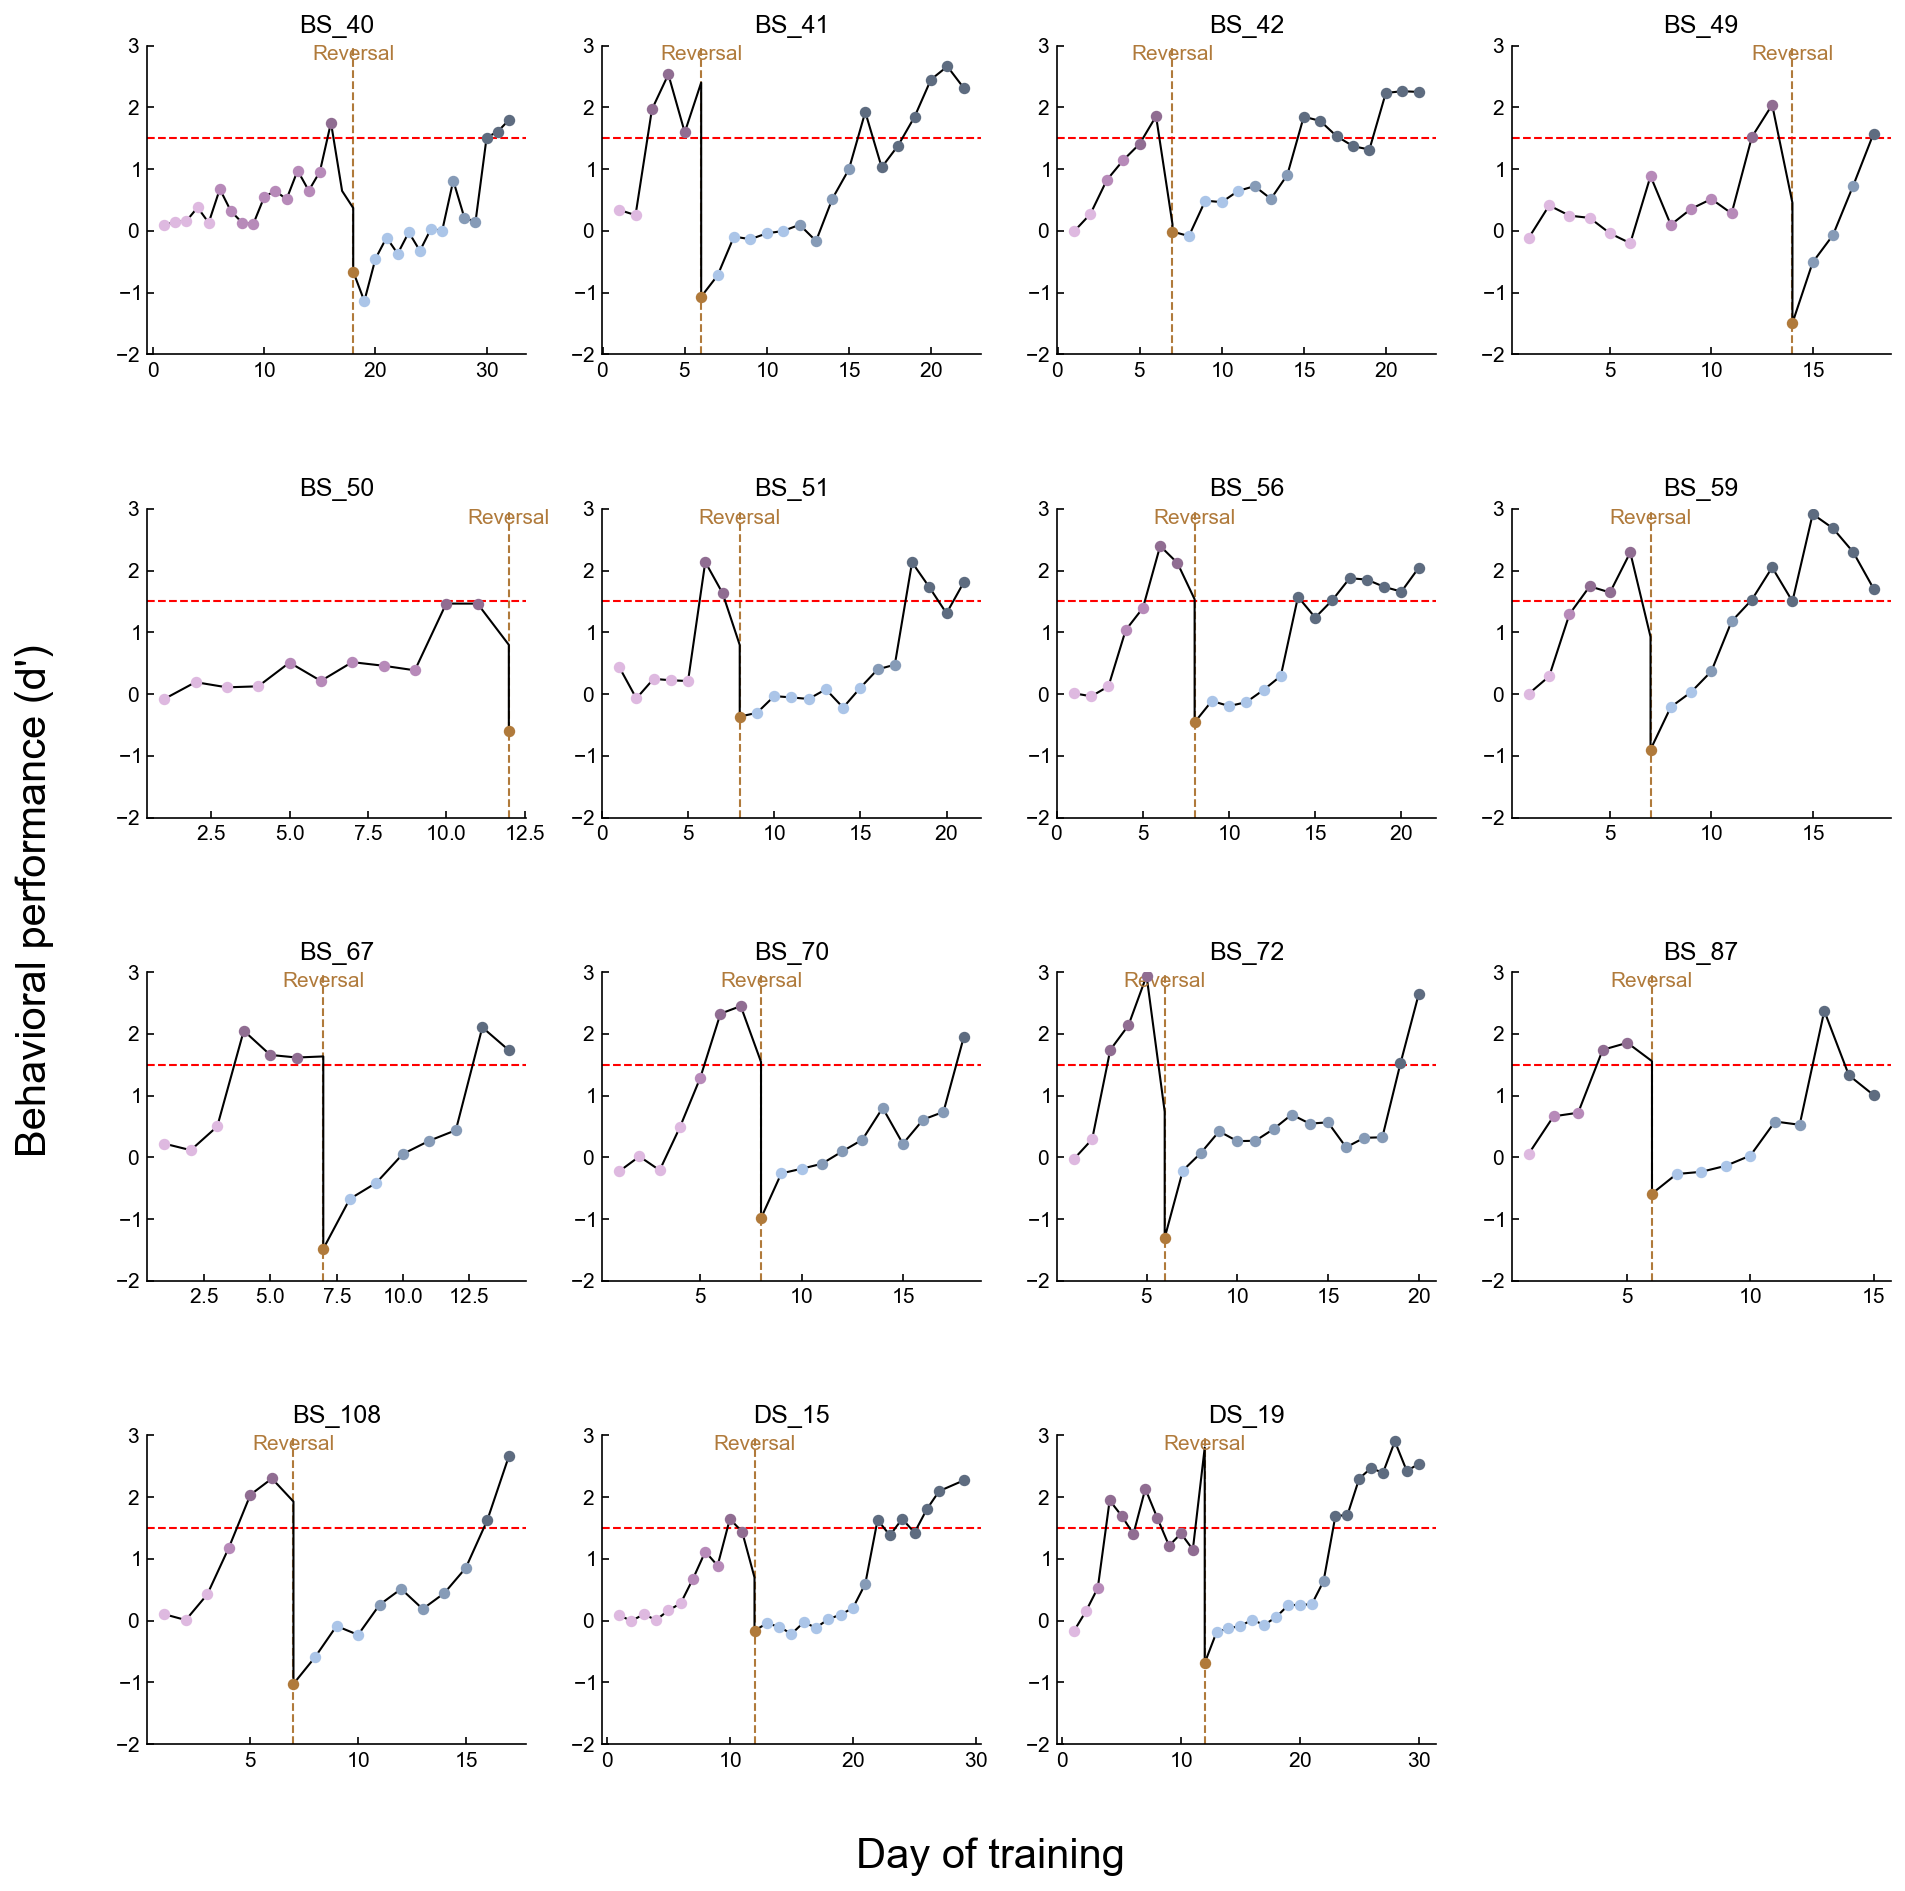

In [4]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [5]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    EnumSession.append(session)
#     for clust in sessionfile.clusters.good:
#         EnumSession.append(session)
#         EnumClust.append(clust)

100%|██████████| 723/723 [00:08<00:00, 87.76it/s] 


In [6]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 145/145 [00:01<00:00, 107.94it/s]

errors for: []


In [7]:
with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
    trialsPerDayLoaded = pickle.load(f)
        
def getReactionTimes(sessionfile):
    trials_to_use = trialsPerDayLoaded[sessionfile.meta.animal][sessionfile.meta.day_of_training]
    
    response_times = sessionfile.trials.response[trials_to_use]
    start_times = sessionfile.trials.starts[trials_to_use]

    session_reaction_times = response_times - start_times
    session_reaction_times = session_reaction_times[sessionfile.trials.go[trials_to_use]]
    
    return session_reaction_times

In [8]:
Rxn_time_preearly = []
Rxn_time_prelate = []
Rxn_time_preexpert = []
Rxn_time_postearly = []
Rxn_time_postlate = []
Rxn_time_postexpert = []

Ramping_preearly = []
Ramping_prelate = []
Ramping_preexpert = []
Ramping_postearly = []
Ramping_postlate = []
Ramping_postexpert = []

for idx,session in tqdm(enumerate(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)

    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    try:
        rxn_time = np.mean(getReactionTimes(sessionfile)) / sessionfile.meta.fs * 1000
        avg_ramp = np.nanmean([sessionfile.responsiveness[clust]['go'].rampingSlopePerSec for clust in sessionfile.clusters.good])
        print(rxn_time)
        print(avg_ramp)
        print()
    except Exception as e:
        print(f"{session} failed with error {e}")
        
    if EILphases[idx] == 'pre early':
        Rxn_time_preearly.append(rxn_time)
        Ramping_preearly.append(avg_ramp)
    elif EILphases[idx] == 'pre late':
        Rxn_time_prelate.append(rxn_time)
        Ramping_prelate.append(avg_ramp)
    elif EILphases[idx] == 'pre expert':
        Rxn_time_preexpert.append(rxn_time)
        Ramping_preexpert.append(avg_ramp)
    elif EILphases[idx] == 'post early':
        Rxn_time_postearly.append(rxn_time)
        Ramping_postearly.append(avg_ramp)
    elif EILphases[idx] == 'post late':
        Rxn_time_postlate.append(rxn_time)
        Ramping_postlate.append(avg_ramp)
    elif EILphases[idx] == 'post expert':
        Rxn_time_postexpert.append(rxn_time)
        Ramping_postexpert.append(avg_ramp)

Rxn_time_preearly = np.array(Rxn_time_preearly)
Rxn_time_prelate = np.array(Rxn_time_prelate)
Rxn_time_preexpert = np.array(Rxn_time_preexpert)
Rxn_time_postearly = np.array(Rxn_time_postearly)
Rxn_time_postlate = np.array(Rxn_time_postlate)
Rxn_time_postexpert = np.array(Rxn_time_postexpert)

Ramping_preearly = np.array(Ramping_preearly)
Ramping_prelate = np.array(Ramping_prelate)
Ramping_preexpert = np.array(Ramping_preexpert)
Ramping_postearly = np.array(Ramping_postearly)
Ramping_postlate = np.array(Ramping_postlate)
Ramping_postexpert = np.array(Ramping_postexpert)

0it [00:00, ?it/s]<ipython-input-8-b8f22fd6385a>:23: RuntimeWarning: Mean of empty slice
  avg_ramp = np.nanmean([sessionfile.responsiveness[clust]['go'].rampingSlopePerSec for clust in sessionfile.clusters.good])
10it [00:00, 88.47it/s]

274.6937984496124
nan

569.9753968253967
nan

456.6319508448541
nan

504.62209876543204
-1.2164322866919515

341.9314711359404
-6.784271173280275

439.8010752688172
-0.3446930423333079

541.0172966781214
nan

562.0466666666667
nan

1192.28
nan

673.2334615384615
-1.6000650473306102

525.7448453608248
10.930265269750866

425.87808398950125
-14.747809519152971

463.1455555555555
-1.9060966866178912



29it [00:00, 75.25it/s]

669.9273262661956
0.6990778074066001

479.7809523809524
nan

326.23229974160205
nan

657.5914893617022
5.01738421424417

757.3095505617977
1.4093389850201368

703.3219721329046
-1.2432500753333133

755.6547999999999
-0.6852446384113133

587.2170645446508
3.039112605034711

601.8964253798034
-0.07537609111755283

595.1643781094526
-1.9162368267975367

417.82166666666666
nan

378.726631393298
2.4551550343463178

529.7758226037196
-5.080443386362106

551.0952380952381
2.5801334579865314

409.87556935817804
nan

493.47606209150325
3.248997778279574

485.40892255892254
-2.974026142339455



39it [00:00, 80.58it/s]

469.6259793814433
-0.8692959770313204

397.63846153846157
-1.6556803965607167

567.9079443079443
-2.890343118814357

327.3315172817809
-1.2711388322624106

357.8137254901961
nan

373.140350877193
nan

746.1505241090147
0.539891710661108

294.7079331941545
-4.454525633456483

271.8517220172202
-6.340250744233276

408.03325617283946
-3.7643208645826802

320.24285714285713
-4.334885529246005

280.53444881889766
5.879469447402029

395.02711962833916
-0.3493658455893654

307.65880758807583
nan



71it [00:00, 128.88it/s]

289.4869791666667
nan

396.58245614035087
1.1798567572017864

370.90881226053637
nan

347.2703921568627
nan

402.4889237199582
1.9254677595354481

335.5943124550036
nan

351.35686274509806
nan

600.2641025641026
-2.219674187838867

681.3720430107526
nan

1170.6944444444446
nan

1121.7066666666667
nan

250.72
nan

271.1846153846154
nan

405.4795031055901
-1.1763339805405688

418.0760204081633
nan

BS_50_11_AC.pickle failed with error 13
476.45509259259256
nan

486.7261261261261
nan

BS_50_4_AC.pickle failed with error index 277 is out of bounds for axis 0 with size 277
313.99192176870747
nan

285.037037037037
nan

325.0695402298851
nan

BS_51_3_AC.pickle failed with error 22
332.37147435897435
nan

321.28733850129197
nan

376.2560699588478
4.199470548465261

350.7346994535519
nan

BS_56_7_AC.pickle failed with error 22
340.1180856180857
-5.29169409224946

285.9632768361582
nan

316.34613333333334
nan

381.5372034956305
3.210862615408848

348.9122676579926
1.5609248921085264

289.7806776

87it [00:00, 135.52it/s]

585.8559228650138
5.094064867969366

344.4872901678657
nan

317.11001100110013
1.8212165716440867

510.51819727891154
-2.6361902028176107

295.47907542579077
nan

443.0272727272727
nan

438.425974025974
nan

357.61594202898556
32.78561558350595

370.1090909090909
nan

BS_72_2_AC.pickle failed with error index 400 is out of bounds for axis 0 with size 400
333.61681363903585
-0.3222044627277937

333.42164179104475
0.9391248363799855

309.60481565086536
-3.5691088715251476

374.3446808510638
1.1292362394414102

342.25021097046414
-7.641402835197312



114it [00:01, 120.28it/s]

322.8709956709956
nan

314.5767337807606
nan

313.34519774011306
nan

341.3516795865633
nan

322.8424242424243
nan

298.31194029850747
nan

399.7947619047619
nan

487.29965156794424
-5.283690550384167

426.849840255591
-7.289629540675308

390.21360799001246
-0.4665162837832349

293.9620689655173
-1.9559449909474218

284.48402366863905
2.593330835095318

356.05796130952376
1.1697719955646075

372.60259740259744
nan

350.13606701940034
-1.8129234300379367

338.0279569892473
nan

464.066156462585
nan

351.8546610169492
0.36365532908468623

412.7132183908046
-2.1803683553143673

330.5485074626866
nan



140it [00:01, 113.00it/s]

428.11553030303037
nan

480.41297539149883
nan

478.00314735336195
nan

434.92391713747645
nan

550.2552631578948
-2.2740818226658117

560.3164021164021
0.37221870061744194

502.87128205128204
nan



145it [00:01, 102.09it/s]


In [9]:
Rxn_time = np.concatenate((Rxn_time_preearly,Rxn_time_prelate,Rxn_time_preexpert,Rxn_time_postearly,Rxn_time_postlate,Rxn_time_postexpert))
Ramping = np.concatenate((Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert))

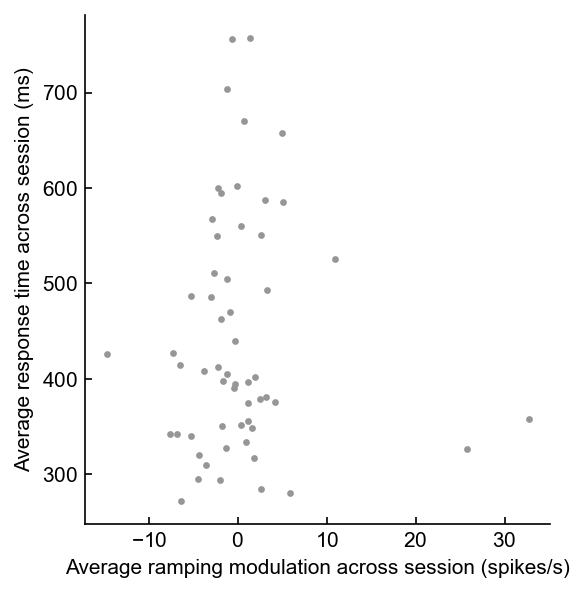

In [10]:
fig, ax = plt.subplots(figsize=(4,4.5))

ax.scatter(Ramping,Rxn_time,s=5,color=GOOD_GREY)

ax.set_xlabel('Average ramping modulation across session (spikes/s)')

ax.set_ylabel('Average response time across session (ms)')


fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Ramping modulation vs reaction time.pdf'),transparent=False,facecolor="white")

In [30]:
X,Y = ilep.paired_rmnan(Ramping,Rxn_time)
pearsonr(X,Y)

(-0.03928607052701731, 0.6964948963783449)

In [13]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:08<00:00, 86.60it/s] 


In [14]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

1830it [00:30, 59.80it/s] 

errors for: []


In [15]:
Ramping_slow_preearly = []
Ramping_slow_prelate = []
Ramping_slow_preexpert = []
Ramping_slow_postearly = []
Ramping_slow_postlate = []
Ramping_slow_postexpert = []

Ramping_fast_preearly = []
Ramping_fast_prelate = []
Ramping_fast_preexpert = []
Ramping_fast_postearly = []
Ramping_fast_postlate = []
Ramping_fast_postexpert = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    rampingMod = sessionfile.responsiveness[clust]['slow_go'].rampingMod
    if rampingMod <= 0:
        continue
    rampingMod = sessionfile.responsiveness[clust]['fast_go'].rampingMod
    if rampingMod <= 0:
        continue
        
    if EILphases[idx] not in ['pre expert','post expert'] and sessionfile.meta.animal in ['DS_15','DS_19']:
        continue
        
    if EILphases[idx] == 'pre early':
        Ramping_slow_preearly.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_preearly.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)
    elif EILphases[idx] == 'pre late':
        Ramping_slow_prelate.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_prelate.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)
    elif EILphases[idx] == 'pre expert':
        Ramping_slow_preexpert.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_preexpert.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)
    elif EILphases[idx] == 'post early':
        Ramping_slow_postearly.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_postearly.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)
    elif EILphases[idx] == 'post late':
        Ramping_slow_postlate.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_postlate.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)
    elif EILphases[idx] == 'post expert':
        Ramping_slow_postexpert.append(sessionfile.responsiveness[clust]['slow_go'].rampingMod)
        Ramping_fast_postexpert.append(sessionfile.responsiveness[clust]['fast_go'].rampingMod)

Ramping_slow_preearly = np.array(Ramping_slow_preearly)
Ramping_slow_prelate = np.array(Ramping_slow_prelate)
Ramping_slow_preexpert = np.array(Ramping_slow_preexpert)
Ramping_slow_postearly = np.array(Ramping_slow_postearly)
Ramping_slow_postlate = np.array(Ramping_slow_postlate)
Ramping_slow_postexpert = np.array(Ramping_slow_postexpert)

Ramping_fast_preearly = np.array(Ramping_fast_preearly)
Ramping_fast_prelate = np.array(Ramping_fast_prelate)
Ramping_fast_preexpert = np.array(Ramping_fast_preexpert)
Ramping_fast_postearly = np.array(Ramping_fast_postearly)
Ramping_fast_postlate = np.array(Ramping_fast_postlate)
Ramping_fast_postexpert = np.array(Ramping_fast_postexpert)

1830it [00:30, 59.86it/s] 


In [21]:
sessionfile.responsiveness[clust]['slow_go']

namespace(trials=array([ 54,  57,  58,  68,  69,  75,  79,  81, 105, 111, 112, 124, 138,
                        150, 161, 167, 185, 223, 225, 233, 243, 245, 252, 255, 263, 272,
                        285, 311, 313, 319, 333, 337, 342, 351, 356, 367, 369, 379, 450,
                        457, 459, 460, 462, 466, 481, 485, 497, 511, 515, 516, 517, 518,
                        520, 590, 591, 630]),
          label='slow_go',
          FRmodulation150=0.8333333333333331,
          offset_response=False,
          FRbaseline=5.0,
          FR=8.571428571428571,
          FRmodulation=3.5714285714285725,
          FRmodulationpertrial=array([  0.        ,  26.66666667,  13.33333333,   0.        ,
                                        0.        ,   0.        ,   0.        ,  20.        ,
                                      -13.33333333,   0.        ,   0.        ,  73.33333333,
                                       20.        ,  -6.66666667,  -6.66666667,  20.        ,
               

In [16]:
Ramping_slow = np.concatenate((Ramping_slow_preearly,Ramping_slow_prelate,Ramping_slow_preexpert,Ramping_slow_postearly,Ramping_slow_postlate,Ramping_slow_postexpert))
Ramping_fast = np.concatenate((Ramping_fast_preearly,Ramping_fast_prelate,Ramping_fast_preexpert,Ramping_fast_postearly,Ramping_fast_postlate,Ramping_fast_postexpert))

IndexError: index -1 is out of bounds for axis 0 with size 0

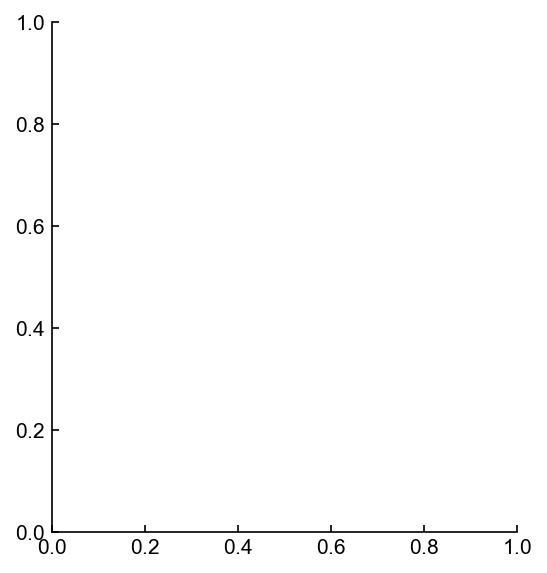

In [17]:
fig, ax = plt.subplots(figsize=(4,4.5))

Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_slow), q) for q in [25, 50, 75])

summary_size=150
summary_width=1
eye_color='purple'
border_color='purple'
ax.scatter([0], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
ax.plot([0,0], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_fast), q) for q in [25, 50, 75])

summary_size=150
summary_width=1
eye_color='green'
border_color='green'
ax.scatter([1], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
ax.plot([1,1], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['Slow responses','Fast responses'])

ax.set_ylim([0,5])
ax.set_ylabel('Ramping modulation (spikes/s)')

fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Fast vs slow response ramping summary V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")#, bbox_extra_artists=(t1,t2), bbox_inches='tight')

In [127]:
Ramping_slow = np.concatenate((Ramping_slow_preearly,Ramping_slow_prelate,Ramping_slow_preexpert,Ramping_slow_postearly,Ramping_slow_postlate,Ramping_slow_postexpert))
Ramping_fast = np.concatenate((Ramping_fast_preearly,Ramping_fast_prelate,Ramping_fast_preexpert,Ramping_fast_postearly,Ramping_fast_postlate,Ramping_fast_postexpert))

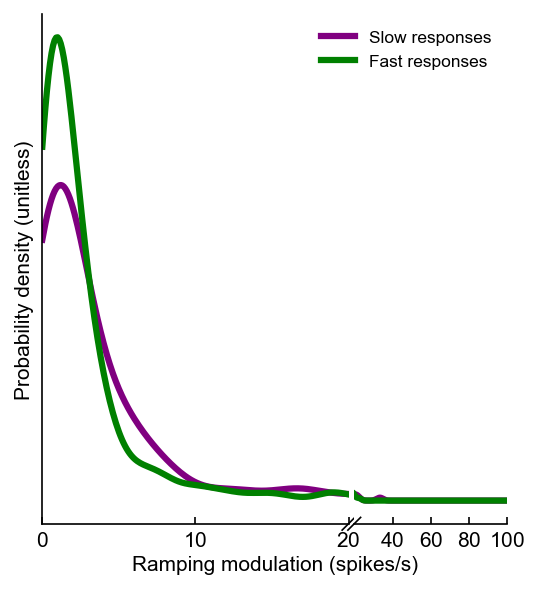

In [101]:
fig = plt.figure(figsize=(4,4.5))
bax = brokenaxes(xlims=( (0,20), (20, 100) ), width_ratios=[4,2], wspace=0.025)
x_range = np.linspace(0,100,1000)

KDE = gaussian_kde(ilep.rmnan(Ramping_slow), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
#KDE_eval = np.cumsum(KDE_eval) / np.sum(KDE_eval)
bax.plot(x_range,KDE_eval,color='purple',lw=3,label='Slow responses')

KDE = gaussian_kde(ilep.rmnan(Ramping_fast), bw_method='scott')
KDE_eval = KDE.evaluate(x_range)
#KDE_eval = np.cumsum(KDE_eval) / np.sum(KDE_eval)
bax.plot(x_range,KDE_eval,color='green',lw=3,label='Fast responses')

bax.axs[0].set_xticks([0,10,20])
bax.axs[1].set_xticks([40,60,80,100])
t1 = bax.set_xlabel('Ramping modulation (spikes/s)')

t2 = bax.axs[0].set_ylabel('Probability density (unitless)')
bax.axs[0].set_yticks([])

bax.legend(frameon=False,loc='upper right')

fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Fast vs slow response ramping V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(t1,t2), bbox_inches='tight')

In [97]:
X,Y = ilep.paired_rmnan(Ramping_fast,Ramping_slow)
mannwhitneyu(X,Y).pvalue

0.2885772019775843

In [76]:
len(X)

325

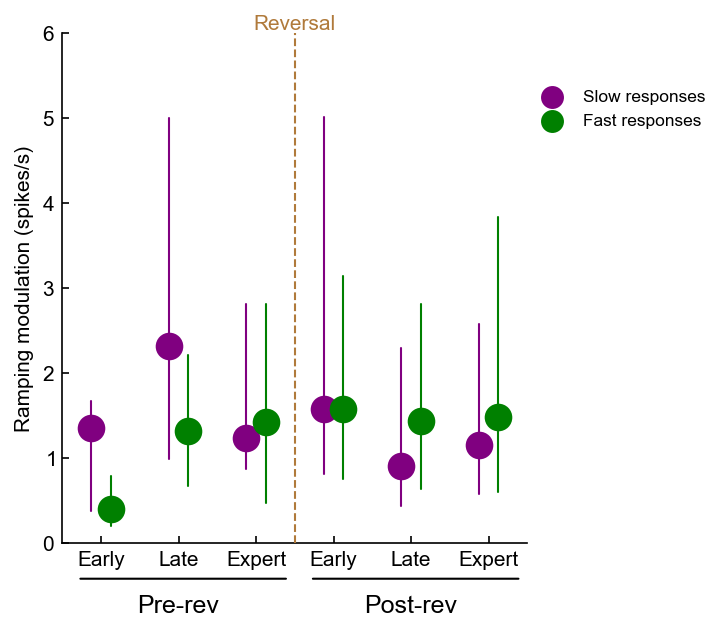

In [132]:
labels = ['Early','Late','Expert','Early','Late','Expert']

fig, ax = plt.subplots(figsize=(4,4.5))
    
for idx,(Ramping_slow) in enumerate([Ramping_slow_preearly,Ramping_slow_prelate,Ramping_slow_preexpert,Ramping_slow_postearly,Ramping_slow_postlate,Ramping_slow_postexpert]):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_slow), q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1
    eye_color='purple'
    border_color='purple'
    ax.scatter([idx-0.125], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx-0.125]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


for idx,(Ramping_fast) in enumerate([Ramping_fast_preearly,Ramping_fast_prelate,Ramping_fast_preexpert,Ramping_fast_postearly,Ramping_fast_postlate,Ramping_fast_postexpert]):
    Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_fast), q) for q in [25, 50, 75])
    summary_size=150
    summary_width=1
    eye_color='green'
    border_color='green'
    ax.scatter([idx+0.125], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx+0.125]*2, [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.set_xlim([-0.5,5.5])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(labels)

ax.set_ylim([0,6])
ax.set_ylabel('Ramping modulation (spikes/s)')

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.15
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='black'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='black'))

ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

ax.scatter([],[], ec='purple',fc='purple', s=100,lw=1, zorder=10,label='Slow responses')
ax.scatter([],[], ec='green',fc='green', s=100,lw=1, zorder=10,label='Fast responses')
lgd = ax.legend(frameon=False,loc=(1,0.8))

fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Fast vs slow response ramping over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,t1,t2), bbox_inches='tight')

In [130]:
### Create dataframe ###
phase = len(Ramping_slow_preearly)*["pre-early"] + len(Ramping_fast_preearly)*["pre-early"] \
    + len(Ramping_slow_prelate)*["pre-late"] + len(Ramping_fast_prelate)*["pre-late"] \
    + len(Ramping_slow_preexpert)*["pre-expert"] + len(Ramping_fast_preexpert)*["pre-expert"] \
    + len(Ramping_slow_postearly)*["post-early"] + len(Ramping_fast_postearly)*["post-early"] \
    + len(Ramping_slow_postlate)*["post-late"] + len(Ramping_fast_postlate)*["post-late"] \
    + len(Ramping_slow_postexpert)*["post-expert"] + len(Ramping_fast_postexpert)*["post-expert"]

context = len(Ramping_slow_preearly)*["slow"] + len(Ramping_fast_preearly)*["fast"] \
    + len(Ramping_slow_prelate)*["slow"] + len(Ramping_fast_prelate)*["fast"] \
    + len(Ramping_slow_preexpert)*["slow"] + len(Ramping_fast_preexpert)*["fast"] \
    + len(Ramping_slow_postearly)*["slow"] + len(Ramping_fast_postearly)*["fast"] \
    + len(Ramping_slow_postlate)*["slow"] + len(Ramping_fast_postlate)*["fast"] \
    + len(Ramping_slow_postexpert)*["slow"] + len(Ramping_fast_postexpert)*["fast"]

mod = (np.concatenate([Ramping_slow_preearly, Ramping_fast_preearly,
    Ramping_slow_prelate, Ramping_fast_prelate,
    Ramping_slow_preexpert, Ramping_fast_preexpert,
    Ramping_slow_postearly, Ramping_fast_postearly,
    Ramping_slow_postlate, Ramping_fast_postlate,
    Ramping_slow_postexpert, Ramping_fast_postexpert]))

df = pd.DataFrame({"phase": phase, "context": context, "FR_mod": mod})



### Anova ###
anova = pg.anova(data=df, dv='FR_mod', between=['phase','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='FR_mod', between=['phase','context'], padjust="fdr_bh", parametric=False, )
#print(pairwise_mwu[pairwise_mwu["Contrast"] == "phase * context"][["phase","A", "B", "p-unc", "p-corr", "hedges"]])
pairwise_mwu

            Source           SS     DF         MS         F     p-unc  \
0            phase   158.792039    5.0  31.758408  2.215120  0.051348   
1          context    48.813970    1.0  48.813970  3.404730  0.065505   
2  phase * context    94.211640    5.0  18.842328  1.314235  0.256174   
3         Residual  8559.251713  597.0  14.337105       NaN       NaN   

        np2  
0  0.018214  
1  0.005671  
2  0.010887  
3       NaN  



,Contrast,phase,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,phase,-,post-early,post-expert,False,False,7206.0,two-sided,5.804525e-01,0.791526,fdr_bh,-0.052106
1,phase,-,post-early,post-late,False,False,10806.0,two-sided,1.894824e-01,0.473706,fdr_bh,0.076815
2,phase,-,post-early,pre-early,False,False,3761.0,two-sided,9.145652e-07,0.000014,fdr_bh,0.631546
3,phase,-,post-early,pre-expert,False,False,4597.0,two-sided,3.635761e-01,0.681705,fdr_bh,0.139787
4,phase,-,post-early,pre-late,False,False,8206.0,two-sided,8.750718e-01,0.875072,fdr_bh,0.071708
5,phase,-,post-expert,post-late,False,False,8153.0,two-sided,4.800084e-01,0.774184,fdr_bh,0.121130
6,phase,-,post-expert,pre-early,False,False,2846.0,two-sided,1.571546e-05,0.000079,fdr_bh,0.568484
7,phase,-,post-expert,pre-expert,False,False,3473.0,two-sided,6.369528e-01,0.796191,fdr_bh,0.170516
8,phase,-,post-expert,pre-late,False,False,6200.0,two-sided,7.695916e-01,0.875072,fdr_bh,0.117612
9,phase,-,post-late,pre-early,False,False,3924.0,two-sided,6.848183e-05,0.000257,fdr_bh,0.534891


In [16]:
Ramping_slow = np.concatenate((Ramping_slow_preearly,Ramping_slow_prelate,Ramping_slow_preexpert,Ramping_slow_postearly,Ramping_slow_postlate,Ramping_slow_postexpert))
Ramping_fast = np.concatenate((Ramping_fast_preearly,Ramping_fast_prelate,Ramping_fast_preexpert,Ramping_fast_postearly,Ramping_fast_postlate,Ramping_fast_postexpert))

## V1

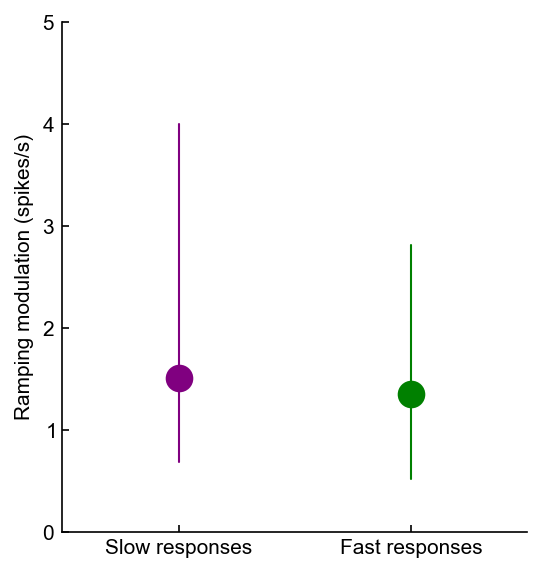

In [129]:
fig, ax = plt.subplots(figsize=(4,4.5))

Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_slow), q) for q in [25, 50, 75])

summary_size=150
summary_width=1
eye_color='purple'
border_color='purple'
ax.scatter([0], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
ax.plot([0,0], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')


Q1, median, Q3 = (np.percentile(ilep.rmnan(Ramping_fast), q) for q in [25, 50, 75])

summary_size=150
summary_width=1
eye_color='green'
border_color='green'
ax.scatter([1], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
ax.plot([1,1], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['Slow responses','Fast responses'])

ax.set_ylim([0,5])
ax.set_ylabel('Ramping modulation (spikes/s)')

fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Fast vs slow response ramping summary V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")#, bbox_extra_artists=(t1,t2), bbox_inches='tight')

## V2